In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("",train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("",train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test,batch_size = 10, shuffle = False)

In [3]:
# Object oriented programming model for PyTorch. These libaries are sort of interchangeable, but most code ends up
# using both
import torch.nn as nn
# Functions
import torch.nn.functional as F

In [4]:
class Net(nn.Module):
    def __init__(self):
#       Runs initialization for nn.Module as well as everything in the local init.
        super().__init__()
    
        # First fully connected layer. Takes image as input (28 X 28) flattened. 
        # Output is 3 layers of 64 neurons for the hidden layers
        # nn.Linear describes a fully connected neural network     
        
        self.fc1 = nn.Linear(28*28,64)
        # fc2 needs to take in 64 as input because fc1 output 64.
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        # 10 corresponds to the amount of classes we have in image recognition. We only have 10 output neurons
        self.fc4 = nn.Linear(64,10)
        
    # How data will flow through network. F.relu is the activation function. I think sigmoid activation?
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        # Don't need activation on output of fc4
        x = self.fc4(x)
        
        return F.softmax(x,dim=1)
        
    
        
net = Net()
print(net)
    

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [5]:
#Set X to some random MNIST image 
X = torch.rand((28,28))
# Resize X to pass into net. The -1 specifies that the image has an unknown shape
X = X.view(-1,28*28)

In [6]:
output = net(X)

In [7]:
output

tensor([[0.1056, 0.0909, 0.1024, 0.0904, 0.1054, 0.1064, 0.1045, 0.0937, 0.0876,
         0.1131]], grad_fn=<SoftmaxBackward>)

In [10]:
# Training the model to predict handwritten numbers
# Loss - How wrong is the model. Goal is to reduce loss
# Optimizer - Adjust weights between neurons to lower the loss over time (Based off of learning rate). Calculating
# gradients and doing gradient descent

import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr = 0.001)

# Epochs are how many passes we are doing through our data set.
EPOCHS = 5

for epoch in range(EPOCHS):
    # Data is a batch of featuresets and labels. It contains the pixel values and the associated labels
    for data in trainset:
        X,y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        # Calculate how wrong we were
        loss = F.nll_loss(output,y)
        # Perform backpropagation to see how well the network is doing on a specific example. Calculates the         
        # cost for unit j in layer l        
        loss.backward()
        # Adjust the weights         
        optimizer.step()
    print(loss)

tensor(-0.9748, grad_fn=<NllLossBackward>)
tensor(-1., grad_fn=<NllLossBackward>)
tensor(-0.9987, grad_fn=<NllLossBackward>)
tensor(-1., grad_fn=<NllLossBackward>)
tensor(-0.8000, grad_fn=<NllLossBackward>)


In [21]:
training_correct = 0
training_total = 0
test_correct = 0
test_total = 0

with torch.no_grad():
    # Checks predictions to see if we were correct     
    
#     for data in trainset:
#         X,y = data
#         output = net(X.view(-1,28*28))
#         for idx, i in enumerate(output):
#             if torch.argmax(i) == y[idx]:
#                 training_correct += 1
#             training_total += 1
        
#     for data in testset:
#         X,y = data
#         output = net(X.view(-1,28*28))
#         for idx, i in enumerate(output):
#             if torch.argmax(i) == y[idx]:
#                 test_correct += 1
#             test_total +=1
    
#     This approach calculates accuracy but avoids the second for loop
        for data in trainset:
            X,y = data
            output = net(X.view(-1,28*28))
            training_correct += output.argmax(dim=1).eq(y).sum().item()
            training_total += len(y)
            
        for data in testset:
            X,y = data
            output = net(X.view(-1,28*28))
            test_correct += output.argmax(dim=1).eq(y).sum().item()
            test_total += len(y)

print("Training accuracy: ", round(training_correct/training_total,3))
print("Test accuracy: ", round(test_correct/test_total,3))
            

Training accuracy:  0.952
Test accuracy:  0.948


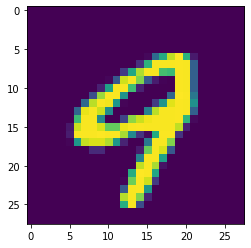

In [27]:
# Plot the actual number by passing in the pixel vector
import matplotlib.pyplot as plt
plt.imshow(X[2].view(28,28))
plt.show()

In [26]:
# Show the value to see where issues may occur
print(torch.argmax(net(X.view(-1,28*28))[2]))

tensor(9)
